### Extracting the Dataset

This cell imports the `zipfile` library to handle compressed files. It then opens the `archive.zip` file, extracts all its contents into the `/content` directory, and closes the zip file. This step is essential for making the image data accessible for further processing.

In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/content/archive.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

### Importing TensorFlow and Keras Layers

This cell imports necessary modules from TensorFlow and Keras. `tensorflow` is the main library, `keras` provides a high-level API for building neural networks, and specific layers like `Dense`, `Conv2D`, `MaxPooling2D`, `Flatten`, `BatchNormalization`, and `Dropout` are imported to construct the Convolutional Neural Network (CNN) model.

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras. layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

### Loading and Preparing Image Datasets


This cell uses `keras.utils.image_dataset_from_directory` to efficiently load images from the specified directories (`/content/train` and `/content/test`). It infers labels from the directory structure, sets the label mode to integer (0 or 1 for binary classification), defines the batch size, and resizes all images to 256x256 pixels. The `class_names` are also extracted, which will be useful for interpreting predictions.

In [91]:
# generators -> images are stored in the form of numpy array
train_ds = keras.utils.image_dataset_from_directory(
  directory = '/content/train',
  labels='inferred',
  label_mode = 'int',  # classify cat and dog in 0,1
  batch_size=32,
  image_size=(256,256)
)
class_names = train_ds.class_names

validation_ds = keras.utils.image_dataset_from_directory(
  directory = '/content/test',
  labels='inferred',
  label_mode = 'int',
  batch_size=32,
  image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


### Normalizing Image Data

This cell defines a `process` function to normalize the image pixel values. Image pixel values typically range from 0 to 255. Normalization scales these values down to a range of 0 to 1 by dividing each pixel by 255. This is a crucial preprocessing step for neural networks as it helps in faster convergence during training and improves model performance.

In [57]:
# Normalize
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

### Defining the CNN Model Architecture

This cell constructs the Convolutional Neural Network (CNN) model using Keras's `Sequential` API. The model includes multiple layers designed for image classification:
-   **`Conv2D` layers**: Extract features from images using filters.
-   **`BatchNormalization` layers**: Stabilize and speed up training by normalizing inputs to each layer.
-   **`MaxPooling2D` layers**: Reduce the spatial dimensions of the feature maps, reducing computational cost and controlling overfitting.
-   **`Flatten` layer**: Converts the 2D feature maps into a 1D vector to be fed into dense layers.
-   **`Dense` layers**: Fully connected layers for classification, with `relu` activation for hidden layers.
-   **`Dropout` layers**: Randomly sets a fraction of input units to 0 at each update during training, which helps prevent overfitting.
-   The final `Dense` layer uses `sigmoid` activation, suitable for binary classification, outputting a probability between 0 and 1.

In [177]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [178]:
# Displaying Model Summary
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [179]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

### Training the Model

This cell initiates the training process for the compiled model using the `model.fit()` method. It feeds the `train_ds` (training dataset) to the model, specifying `epochs=10` for 10 full passes over the training data. The `validation_data=validation_ds` argument tells the model to evaluate its performance on the validation dataset at the end of each epoch, which is crucial for monitoring overfitting.

In [180]:
history = model.fit(train_ds, epochs=10, validation_data= validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 94ms/step - accuracy: 0.5702 - loss: 3.0161 - val_accuracy: 0.6256 - val_loss: 0.7257
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.6857 - loss: 0.5976 - val_accuracy: 0.7158 - val_loss: 0.5511
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.7540 - loss: 0.5030 - val_accuracy: 0.7694 - val_loss: 0.4829
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.7904 - loss: 0.4469 - val_accuracy: 0.7496 - val_loss: 0.5189
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8236 - loss: 0.3945 - val_accuracy: 0.7872 - val_loss: 0.4684
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.8580 - loss: 0.3354 - val_accuracy: 0.7760 - val_loss: 0.6002
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8928 - loss: 0.2526 - val_accuracy: 0.8158 - val_loss: 0.4615
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 98ms/step - accuracy: 0.9287 - loss: 0.1803 - 

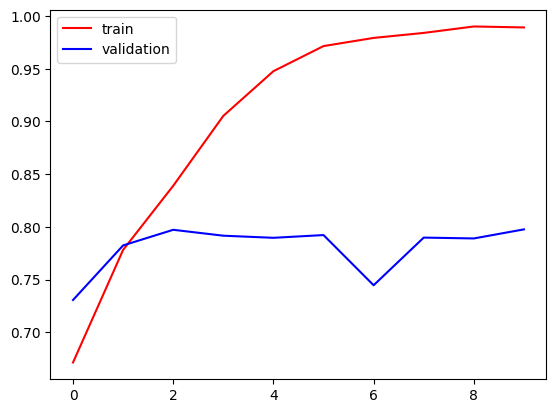

In [ ]:
import matplotlib.pyplot as plt
# Visualizing Training and Validation Accuracy (Before Reducing Overfitting)
plt.plot(history.history['accuracy'],color='red',label='train' )
plt.plot(history.history['val_accuracy'],color='blue' , label='validation')
plt. legend()
plt. show()

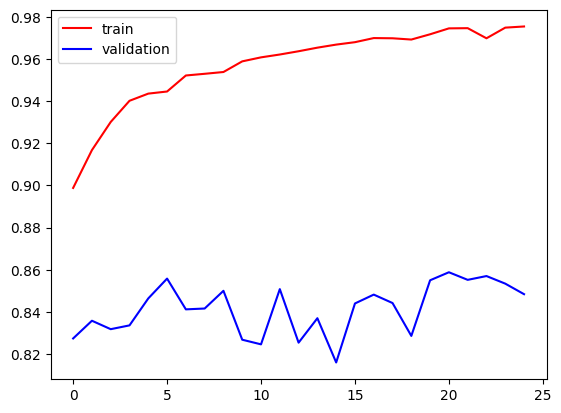

In [106]:
# Visualizing Training and Validation Accuracy (After Reducing Overfitting)
plt.plot(history.history['accuracy'],color='red',label='train' )
plt.plot(history.history['val_accuracy'],color='blue' , label='validation')
plt.legend()
plt.show()

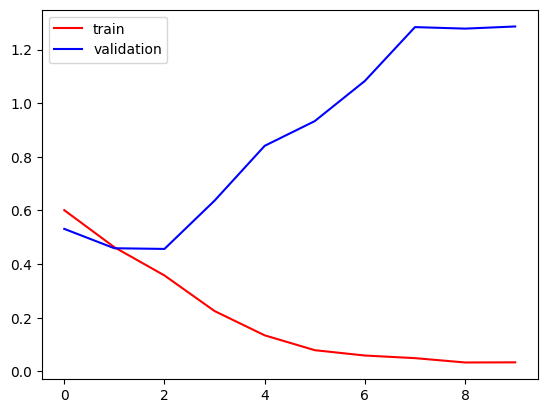

In [ ]:
# Visualizing Training and Validation Loss (Before Augmentation)
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue' , label='validation')
plt.legend()
plt.show()

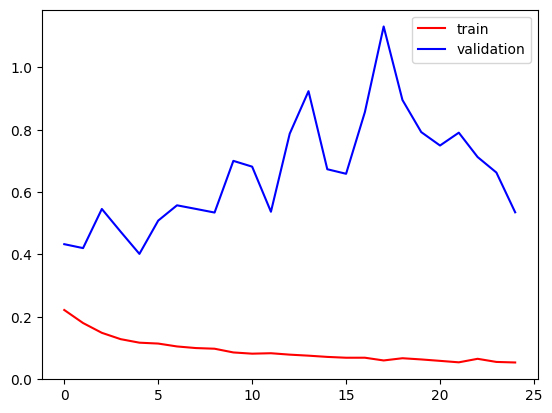

In [107]:
# Visualizing Training and Validation Loss (After Reducing Overfitting)
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue' , label='validation')
plt.legend()
plt.show()

In [108]:
import cv2

In [109]:
test_img = cv2.imread('/content/dog.30.jpg')

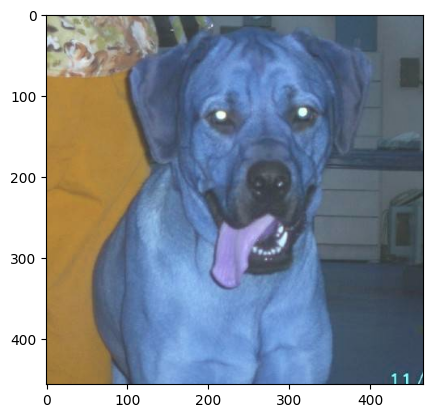

In [110]:
plt.imshow(test_img)

In [111]:
test_img.shape

(457, 466, 3)

### Resizing the Test Image

This cell resizes the `test_img` to `(256, 256)` pixels using `cv2.resize`. This step is necessary to match the input dimensions expected by the trained CNN model.

In [112]:
test_img = cv2.resize(test_img,(256,256))

In [113]:
test_img = test_img / 255.0

In [114]:
test_input = test_img.reshape((1,256,256,3))

### Making a Prediction on the Test Image

This cell uses the trained `model` to make a prediction on the preprocessed `test_input`. The `model.predict()` method outputs a probability (due to the `sigmoid` activation in the final layer). The code then prints this probability and determines whether the image is classified as a 'dog' or 'cat' based on a threshold of 0.5, using the `class_names` derived from the dataset.

In [176]:
prediction = model.predict(test_input)

print("Probability:", prediction[0][0])

if prediction[0][0] > 0.5:
    print(class_names[1])
else:
    print(class_names[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Probability: 0.5051842
dogs


In [119]:
len(validation_ds)

157

In [181]:
# Evaluating Model Performance
model.evaluate(validation_ds)

157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8226 - loss: 0.7590


[0.7686231732368469, 0.821399986743927]

### Defining Model with Data Augmentation

This cell defines a new Sequential model (`model_aug`) that incorporates data augmentation layers. A `keras.Sequential` object `data_aug` is created with `RandomFlip`, `RandomRotation`, and `RandomZoom` layers. This `data_aug` sequence is added as the first layer to `model_aug`, ensuring that training images are augmented on the fly. The rest of the model architecture is similar to the initial CNN, but with slightly increased `Dropout` rates to further combat overfitting, which is common when using data augmentation.

In [140]:
data_aug = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.2),
        keras.layers.RandomZoom(0.2),
    ]
)

model_aug = Sequential()

model_aug.add(data_aug)

model_aug.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model_aug.add(BatchNormalization())
model_aug.add(MaxPooling2D(2,2))

model_aug.add(Conv2D(64,(3,3),activation='relu'))
model_aug.add(BatchNormalization())
model_aug.add(MaxPooling2D(2,2))

model_aug.add(Conv2D(128,(3,3),activation='relu'))
model_aug.add(BatchNormalization())
model_aug.add(MaxPooling2D(2,2))

model_aug.add(Flatten())

model_aug.add(Dense(128,activation='relu'))
model_aug.add(Dropout(0.2))

model_aug.add(Dense(64,activation='relu'))
model_aug.add(Dropout(0.2))

model_aug.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [141]:
model_aug.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

### Importing EarlyStopping Callback

This cell imports the `EarlyStopping` callback from `keras.callbacks`. Early stopping is a regularization technique used during training to prevent overfitting. It monitors a chosen metric (like validation loss) and stops training if the metric stops improving for a specified number of epochs.

In [142]:
from keras.callbacks import EarlyStopping
print("EarlyStopping imported successfully.")

EarlyStopping imported successfully.


In [127]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

### Training the Augmented Model with EarlyStopping

This cell trains the `model_aug` using the `train_ds` and `validation_ds`. It's set to train for `epochs=20`, which is a higher number to allow the model to learn more from the augmented data. Crucially, the `callbacks=[early_stopping_callback]` argument is passed to automatically stop training if the validation loss plateaus, thus preventing overfitting and optimizing training time.

In [143]:
history_aug = model_aug.fit(train_ds, epochs=20, validation_data=validation_ds, callbacks=[early_stopping_callback])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 110s 169ms/step - accuracy: 0.5284 - loss: 2.5985 - val_accuracy: 0.5956 - val_loss: 0.6576
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 168ms/step - accuracy: 0.5741 - loss: 0.7046 - val_accuracy: 0.6740 - val_loss: 0.6244
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 167ms/step - accuracy: 0.6548 - loss: 0.6183 - val_accuracy: 0.7180 - val_loss: 0.5510
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 166ms/step - accuracy: 0.6864 - loss: 0.5866 - val_accuracy: 0.7310 - val_loss: 0.5417
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 168ms/step - accuracy: 0.6997 - loss: 0.5590 - val_accuracy: 0.7584 - val_loss: 0.5051
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 166ms/step - accuracy: 0.7290 - loss: 0.5377 - val_accuracy: 0.6950 - val_loss: 0.6022
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 172ms/step - accuracy: 0.7352 - loss: 0.5283 - val_accuracy: 0.7808 - val_loss: 0.4674
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 103s 165ms/step - accuracy: 0.7585 -


**Comparing Validation Accuracy (Before vs. After Augmentation)**

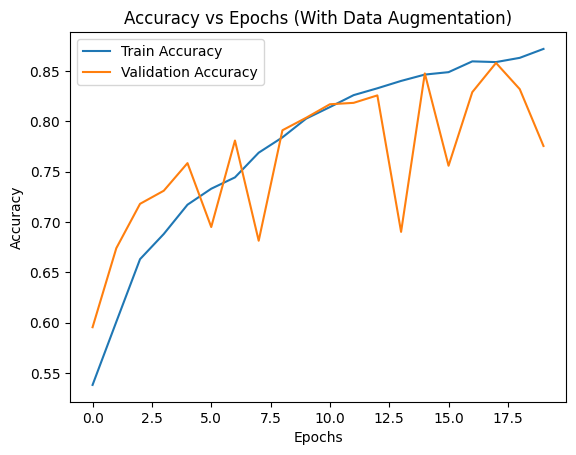

In [144]:
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs (With Data Augmentation)")

plt.legend()
plt.show()


**Comparing Validation Loss (Before vs. After Augmentation)**

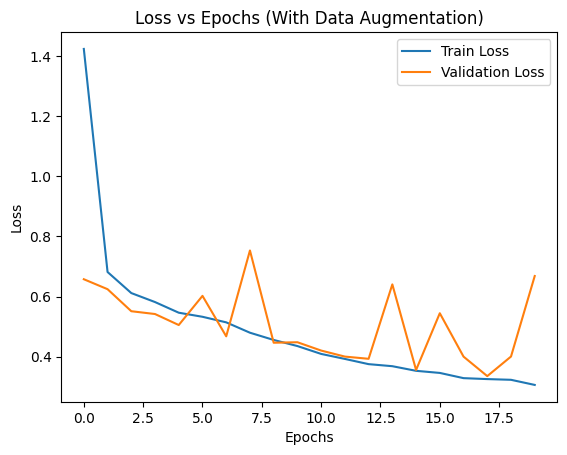

In [145]:
plt.plot(history_aug.history['loss'], label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Validation Loss')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs (With Data Augmentation)")

plt.legend()
plt.show()

### Evaluating Augmented Model Performance

This cell evaluates the final performance of the `model_aug` on the `validation_ds` after training with data augmentation and early stopping. It provides the final loss and accuracy metrics, which should ideally be improved compared to the initial model, demonstrating better generalization.

In [147]:
model_aug.evaluate(validation_ds)

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.8567 - loss: 0.3404


[0.33494114875793457, 0.8578000068664551]

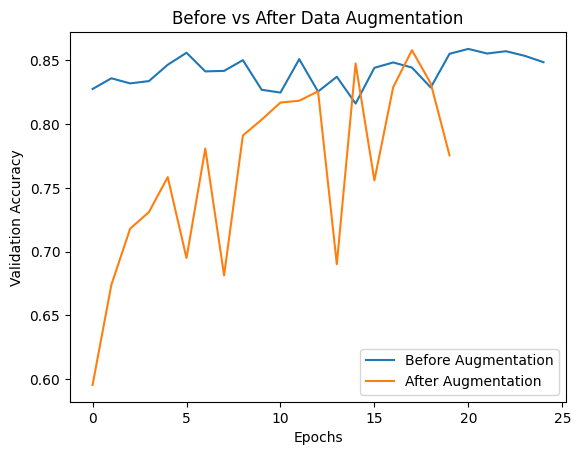

In [148]:
plt.plot(history.history['val_accuracy'], label='Before Augmentation')
plt.plot(history_aug.history['val_accuracy'], label='After Augmentation')

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Before vs After Data Augmentation")

plt.legend()
plt.show()

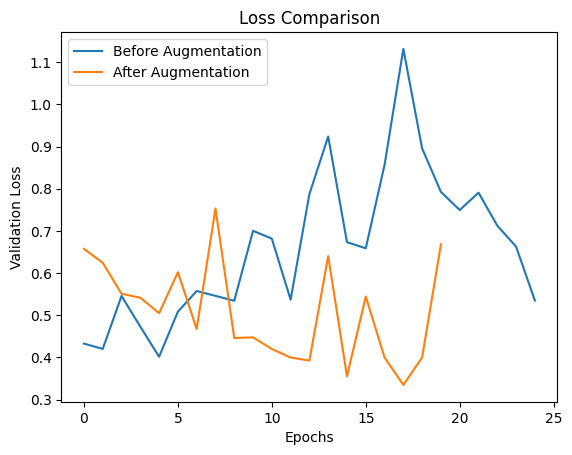

In [149]:
plt.plot(history.history['val_loss'], label='Before Augmentation')
plt.plot(history_aug.history['val_loss'], label='After Augmentation')

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Loss Comparison")

plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Probability: 0.3838799
cats


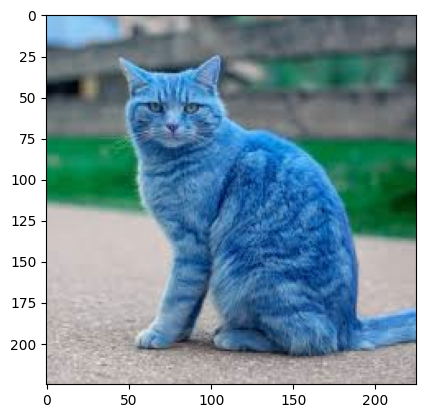

In [193]:

test_img = cv2.imread('/content/cat.jpg')

plt.imshow(test_img)

test_img = cv2.resize(test_img,(256,256))

# test_img =  test_img / 255

test_input = test_img.reshape((1,256,256,3))

prediction = model_aug.predict(test_input)

print("Probability:", prediction[0][0])

if prediction[0][0] > 0.5:
    print(class_names[1])
else:
    print(class_names[0])

In [194]:
model_aug.save("cat_dog_model.h5")

In [195]:
from google.colab import files
files.download("cat_dog_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>